In [2]:
import pandas as pd
import numpy as np

The original downloaded dataset has 6,647,235 rows (calculated with wc -l). I will thus begin exploring a smaller dataset.

In [3]:
df = pd.read_table('sgadata_costanzo2009_rawdata_101120.txt', header = None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,YAL063C,FLO9,YAL068C,PAU8,NaN,NaN,NaN,1.1026,0.0119,1.0353,0.0081,NaN,NaN
1,YAL063C,FLO9,YAL067C,SEO1,NaN,NaN,NaN,1.1026,0.0119,1.0204,0.0064,NaN,NaN
2,YAL063C,FLO9,YAL066W,YAL066W,NaN,NaN,NaN,1.1026,0.0119,1.0610,0.0108,NaN,NaN
3,YAL063C,FLO9,YAL065C,YAL065C,NaN,NaN,NaN,1.1026,0.0119,1.0532,0.0085,NaN,NaN
4,YAL063C,FLO9,YAL064C-A,YAL064C-A,NaN,NaN,NaN,1.1026,0.0119,1.0210,0.0077,NaN,NaN


In [5]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
6647230,YPR198W,SGE1,YPR197C,YPR197C,NaN,NaN,NaN,1.0501,0.0111,1.0392,0.0132,NaN,NaN
6647231,YPR198W,SGE1,YPR198W,SGE1,NaN,NaN,NaN,1.0501,0.0111,1.0501,0.0111,NaN,NaN
6647232,YPR198W,SGE1,YPR199C,ARR1,NaN,NaN,NaN,1.0501,0.0111,1.0184,0.0057,NaN,NaN
6647233,YPR198W,SGE1,YPR200C,ARR2,NaN,NaN,NaN,1.0501,0.0111,1.0329,0.0084,NaN,NaN
6647234,YPR198W,SGE1,YPR201W,ARR3,NaN,NaN,NaN,1.0501,0.0111,1.0397,0.0095,NaN,NaN


What is this dataset? There are 12 columns in the dataset. 

#### Description of Genes

Query ORF 

Query gene name

Array ORF

Array gene name


#### Quantizing the Interaction

Genetic interaction score (ε)

Standard deviation

p-value

Query single mutant fitness (SMF)

Query SMF standard deviation

Array SMF

Array SMF standard deviation

Double mutant fitness

Double mutant fitness standard deviation

### Preprocessing

In [6]:
len(df)

6647235

In [7]:
 1712 * 3885 

6651120

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,YAL063C,FLO9,YAL068C,PAU8,NaN,NaN,NaN,1.1026,0.0119,1.0353,0.0081,NaN,NaN
1,YAL063C,FLO9,YAL067C,SEO1,NaN,NaN,NaN,1.1026,0.0119,1.0204,0.0064,NaN,NaN
2,YAL063C,FLO9,YAL066W,YAL066W,NaN,NaN,NaN,1.1026,0.0119,1.0610,0.0108,NaN,NaN
3,YAL063C,FLO9,YAL065C,YAL065C,NaN,NaN,NaN,1.1026,0.0119,1.0532,0.0085,NaN,NaN
4,YAL063C,FLO9,YAL064C-A,YAL064C-A,NaN,NaN,NaN,1.1026,0.0119,1.0210,0.0077,NaN,NaN


In [9]:
df2 = df.ix[:, [0,2,4,5,6]]

In [10]:
df2.columns = ["QueryORF", "ArrayORF", "Score", "Std-Dev", "P-Val"]
df2.head()

,QueryORF,ArrayORF,Score,Std-Dev,P-Val
0,YAL063C,YAL068C,NaN,NaN,NaN
1,YAL063C,YAL067C,NaN,NaN,NaN
2,YAL063C,YAL066W,NaN,NaN,NaN
3,YAL063C,YAL065C,NaN,NaN,NaN
4,YAL063C,YAL064C-A,NaN,NaN,NaN


In [11]:
df3 = df2.dropna(subset = ["Score"])

In [12]:
df3.head()

,QueryORF,ArrayORF,Score,Std-Dev,P-Val
68,YAL063C,YBL106C,-0.0107,0.0148,0.33360
73,YAL063C,YBL100C,-0.0169,0.0134,0.20687
74,YAL063C,YBL098W,-0.0306,0.0472,0.29083
75,YAL063C,YBL096C,-0.0396,0.0786,0.30134
76,YAL063C,YBL095W,-0.0319,0.0191,0.12602


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6002018 entries, 68 to 6647161
Data columns (total 5 columns):
QueryORF    object
ArrayORF    object
Score       float64
Std-Dev     float64
P-Val       float64
dtypes: float64(3), object(2)
memory usage: 274.8+ MB


In [14]:
len(df3["QueryORF"].unique())

1711

In [92]:
list(df3["QueryORF"].unique())

['YAL063C',
 'YAL060W',
 'YAL059W',
 'YAL058W',
 'YAL056W',
 'YAL043C_damp',
 'YAL042W',
 'YAL041W_tsq412',
 'YAL041W_tsq149',
 'YAL041W_tsq148',
 'YAL038W_tsq26',
 'YAL034W-A_tsq235',
 'YAL030W',
 'YAL025C_damp',
 'YAL021C_damp',
 'YAL021C',
 'YAL020C',
 'YAL013W',
 'YAL012W',
 'YAL011W',
 'YAL010C',
 'YAL002W',
 'YAR002W',
 'YAR003W',
 'YAR029W',
 'YAR071W',
 'YBL105C_tsq539',
 'YBL105C_tsq535',
 'YBL103C',
 'YBL102W',
 'YBL098W',
 'YBL089W',
 'YBL087C',
 'YBL084C_tsq92',
 'YBL079W',
 'YBL078C',
 'YBL075C',
 'YBL064C',
 'YBL061C',
 'YBL058W',
 'YBL057C',
 'YBL050W_tsq48',
 'YBL047C',
 'YBL039C',
 'YBL037W',
 'YBL035C_tsq365',
 'YBL034C_tsq822',
 'YBL034C_tsq274',
 'YBL032W',
 'YBL031W',
 'YBL023C_tsq111',
 'YBL021C',
 'YBL015W',
 'YBL008W',
 'YBL007C',
 'YBL003C',
 'YBR001C',
 'YBR007C',
 'YBR009C',
 'YBR010W',
 'YBR016W',
 'YBR019C',
 'YBR024W',
 'YBR026C',
 'YBR033W',
 'YBR034C',
 'YBR037C',
 'YBR042C',
 'YBR045C',
 'YBR048W',
 'YBR054W',
 'YBR055C_tsq455',
 'YBR058C',
 'YBR059C',


In [93]:
list(df3["QueryORF"].unique()).index('YAL025C_damp')

13

In [15]:
len(df3["ArrayORF"].unique())

3885

## Task 1

Implementation Steps:

(1) Create Gene Interaction Matrix

(2) Compute PCC between each pair of genes (worry about averaging later)

(3) Screen those that have PCC > .2

(4) Graph interactions potentially with Cytoscape

To generate the network shown in Fig. 1, genetic interaction profile similarities were measured for all query and array gene pairs by computing Pearson correlation coefficients (PCC) from the complete genetic interaction matrix. Correlation coefficients of gene pairs screened both as queries and as arrays were averaged. Gene pairs whose profile similarity exceeded a PCC > 0.2 threshold were connected in the network, and an edge-weighted spring-embedded layout, implemented in Cytoscape (S4), was applied to determine node position. Genes sharing similar patterns of genetic interactions located proximal to each other in two-dimensional space, while less-similar genes were positioned further apart.

In [73]:
df3.head()

,QueryORF,ArrayORF,Score,Std-Dev,P-Val
68,YAL063C,YBL106C,-0.0107,0.0148,0.33360
73,YAL063C,YBL100C,-0.0169,0.0134,0.20687
74,YAL063C,YBL098W,-0.0306,0.0472,0.29083
75,YAL063C,YBL096C,-0.0396,0.0786,0.30134
76,YAL063C,YBL095W,-0.0319,0.0191,0.12602


In [83]:
df5 = df3.ix[:, 0:3]
df5.head()

,QueryORF,ArrayORF,Score
68,YAL063C,YBL106C,-0.0107
73,YAL063C,YBL100C,-0.0169
74,YAL063C,YBL098W,-0.0306
75,YAL063C,YBL096C,-0.0396
76,YAL063C,YBL095W,-0.0319


In [84]:
df5.tail()

,QueryORF,ArrayORF,Score
6647157,YPR198W,YPR071W,-0.0203
6647158,YPR198W,YPR073C,-0.0342
6647159,YPR198W,YPR074C,-0.0202
6647160,YPR198W,YPR075C,0.0298
6647161,YPR198W,YPR076W,-0.0042


In [94]:
queryLabels = list(df5["QueryORF"].unique())
arrayLabels = list(df5["ArrayORF"].unique())

In [103]:
tmp = arrayLabels + queryLabels

In [104]:
len(tmp)

5596

In [106]:
len(set(tmp))

4457

In [96]:
def queryID(x):
    return queryLabels.index(x)

def arrayID(x):
    return arrayLabels.index(x)
    

df5["QueryID"] = df5["QueryORF"].map(queryID)
df5["ArrayID"] = df5["ArrayORF"].map(arrayID)

In [98]:
df5.head(50)

,QueryORF,ArrayORF,Score,QueryID,ArrayID
68,YAL063C,YBL106C,-0.0107,0,0
73,YAL063C,YBL100C,-0.0169,0,1
74,YAL063C,YBL098W,-0.0306,0,2
75,YAL063C,YBL096C,-0.0396,0,3
76,YAL063C,YBL095W,-0.0319,0,4
78,YAL063C,YBL091C,-0.0089,0,5
79,YAL063C,YBL089W,-0.0170,0,6
84,YAL063C,YBL083C,-0.0209,0,7
85,YAL063C,YBL082C,-0.0380,0,8
89,YAL063C,YBL072C,-0.0786,0,9


In [142]:
len(df5["QueryID"].unique())

1711

In [126]:
edge_list = df5[["QueryID", "ArrayID", "Score"]]

In [132]:
edge_list.head()

,QueryID,ArrayID,Score
68,0,0,-0.0107
73,0,1,-0.0169
74,0,2,-0.0306
75,0,3,-0.0396
76,0,4,-0.0319


In [151]:
# import numpy as np
def edgesToAdjMatrix(edge_list):
    import scipy.sparse as sps
    A = np.array(edge_list.values.tolist())
    i, j, weight = A[:,0], A[:,1], A[:,2]
    # find the dimension of the weight matrix
    dimI =  len(set(i))
    dimJ =  len(set(j))

    B = sps.lil_matrix((dimI, dimJ))
    for i,j,w in zip(i,j,weight):
        B[i,j] = w
    return B

In [148]:
adj = edgesToAdjMatrix(edge_list)

In [176]:
adj2.get_shape()[0]

1711

In [152]:
adj2 = edgesToAdjMatrix(edge_list)

In [156]:
import pickle
with open('qcb.pickle', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([df5, edge_list, adj, adj2], f)

In [175]:
from scipy.stats.stats import pearsonr
row1 = adj2.getrow(1).toarray()[0]
row2 = adj2.getrow(2).toarray()[0]
pearsonr(row1, row2)[0]

0.026416855992291429

In [180]:
#Calculate pearson row similarity matrix (sparse) from the adjacency sparse matrix
# from scipy.stats.stats import pearsonr
# import scipy.sparse as sps
def adjToPearsonRows(adj):
    nrows = adj.get_shape()[0]
    C = sps.lil_matrix((nrows,nrows))
    for i in range(0,nrows):
        for j in range(i+1,nrows):
            row1 = adj.getrow(i).toarray()[0]
            row2 = adj.getrow(j).toarray()[0]
            sim_score = pearsonr(row1,row2)[0]
            if (sim_score > .2):
                C[i,j] = sim_score
                C[j,i] = sim_score
            
    return C

In [181]:
simQ = adjToPearsonRows(adj2)

In [182]:
simQ.get_shape()

(1711, 1711)

In [183]:
with open('simQ.pickle', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([simQ], f)

### Task 2

We measured the number of positive and negative interactions for all 3885 non-essential array deletion mutants at the intermediate cutoff (|"| > 0.08, p < 0.05). Genetic interaction hubs were selected as the top 10% highest connected genes. Genes with a bias towards positive interactions were selected by finding genes with at least 30 total interactions and positive to negative ratio greater than 1, which is twice the background ratio. Genes with a bias towards negative interactions were selected by finding genes with at least 30 total interactions and positive to negative ratio lower than 0.25, which is one-half of the background ratio. Both of these sets consisted of approximately 130 genes.


Implementation Steps:

(1) For each of the 3885 "non-essential array deletion mutants at the intermediate cutoff", get the number of positive and negative interactions. 

(2) Mark interaction hubs as the ones that are in the 10th percentile in terms of these interactions?

(3) Generate positive bias genes according to afformentioend criteria

(4) Generate negative bias genes according to aforementioned criteria. 

In [16]:
df4 = df3[(df3["P-Val"] < .05) & (abs(df3["Score"]) > .08) ]

In [17]:
len(df4)

187324

In [18]:
def pos(x):
    return int(x > 0)

def neg(x):
    return int(x < 0)
    

df4["Pos"] = df4["Score"].map(pos)
df4["Neg"] = df4["Score"].map(neg)

/Users/advaitchauhan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/advaitchauhan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
df4.head()

,QueryORF,ArrayORF,Score,Std-Dev,P-Val,Pos,Neg
319,YAL063C,YBR266C,-0.1071,0.0184,1.878000e-05,0,1
405,YAL063C,YCR009C,-0.0977,0.0462,4.244800e-02,0,1
422,YAL063C,YCR028C-A,-0.1969,0.0273,1.518800e-08,0,1
1016,YAL063C,YER095W,-0.1079,0.0383,1.160900e-02,0,1
1054,YAL063C,YER153C,-0.0894,0.0129,4.712800e-07,0,1


In [20]:
df4[["Pos", "Neg"]].sum()

Pos     66533
Neg    120791
dtype: int64

In [37]:
pos = df4.groupby("ArrayORF")["Pos"].sum()
pos

ArrayORF
YAL002W      83
YAL004W      25
YAL005C      25
YAL007C       9
YAL008W       8
YAL010C      75
YAL011W      63
YAL013W      51
YAL014C      20
YAL015C       9
YAL017W      11
YAL018C       6
YAL019W      16
YAL020C      13
YAL022C       4
YAL023C      36
YAL024C      31
YAL027W       5
YAL028W       3
YAL029C       3
YAL030W       2
YAL031C       5
YAL034C       5
YAL036C       5
YAL037W       5
YAL040C      12
YAL042W       1
YAL043C-A     4
YAL045C       8
YAL046C       5
             ..
YPR152C       4
YPR153W      25
YPR154W       5
YPR155C       5
YPR156C       8
YPR157W       3
YPR158W       1
YPR160W      25
YPR164W      16
YPR167C       3
YPR170C       5
YPR171W      13
YPR172W       2
YPR174C      15
YPR179C      54
YPR184W       9
YPR185W      15
YPR188C       7
YPR189W      25
YPR191W      29
YPR192W       4
YPR193C       9
YPR194C      16
YPR195C       9
YPR196W       4
YPR197C      27
YPR198W       7
YPR199C       2
YPR200C       2
YPR201W       9
Name: Pos, dtyp

In [38]:
neg = df4.groupby("ArrayORF")["Neg"].sum()
neg

ArrayORF
YAL002W      102
YAL004W       23
YAL005C       22
YAL007C        9
YAL008W        7
YAL010C      123
YAL011W      119
YAL013W      151
YAL014C       14
YAL015C        4
YAL017W       15
YAL018C       25
YAL019W       51
YAL020C       25
YAL022C        5
YAL023C       42
YAL024C      104
YAL027W        7
YAL028W       17
YAL029C        0
YAL030W        6
YAL031C        9
YAL034C       10
YAL036C       18
YAL037W        5
YAL040C       30
YAL042W       23
YAL043C-A     21
YAL045C       17
YAL046C        8
            ... 
YPR152C       15
YPR153W       43
YPR154W        2
YPR155C       21
YPR156C        3
YPR157W        1
YPR158W       11
YPR160W       47
YPR164W       31
YPR167C       40
YPR170C       14
YPR171W       11
YPR172W        7
YPR174C        6
YPR179C      103
YPR184W        1
YPR185W       76
YPR188C       13
YPR189W       24
YPR191W      149
YPR192W        5
YPR193C       16
YPR194C       10
YPR195C       11
YPR196W        3
YPR197C       37
YPR198W        8
YPR19

In [39]:
tot = df4.groupby("ArrayORF").size()
tot

ArrayORF
YAL002W      185
YAL004W       48
YAL005C       47
YAL007C       18
YAL008W       15
YAL010C      198
YAL011W      182
YAL013W      202
YAL014C       34
YAL015C       13
YAL017W       26
YAL018C       31
YAL019W       67
YAL020C       38
YAL022C        9
YAL023C       78
YAL024C      135
YAL027W       12
YAL028W       20
YAL029C        3
YAL030W        8
YAL031C       14
YAL034C       15
YAL036C       23
YAL037W       10
YAL040C       42
YAL042W       24
YAL043C-A     25
YAL045C       25
YAL046C       13
            ... 
YPR152C       19
YPR153W       68
YPR154W        7
YPR155C       26
YPR156C       11
YPR157W        4
YPR158W       12
YPR160W       72
YPR164W       47
YPR167C       43
YPR170C       19
YPR171W       24
YPR172W        9
YPR174C       21
YPR179C      157
YPR184W       10
YPR185W       91
YPR188C       20
YPR189W       49
YPR191W      178
YPR192W        9
YPR193C       25
YPR194C       26
YPR195C       20
YPR196W        7
YPR197C       64
YPR198W       15
YPR19

In [40]:
len(tot)

3885

In [41]:
len(pos)

3885

In [42]:
len(neg)

3885

In [43]:
type(pos)

pandas.core.series.Series

In [45]:
ratDf = pd.DataFrame({"Pos": pos, "Neg": neg, "Tot": tot})

In [124]:
ratDf["ratio"] = ratDf["Pos"] / (ratDf["Neg"] + 1)

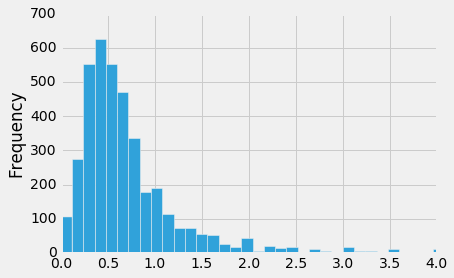

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
ratDf["ratio"].plot(kind = 'hist', bins = 100, xlim = (0, 4))

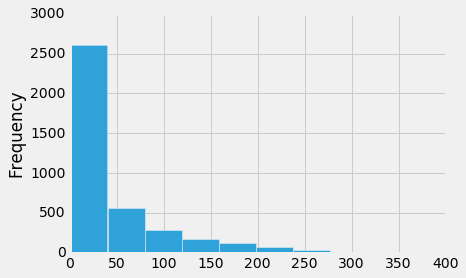

In [72]:
ratDf["Tot"].plot(kind = 'hist')

In [81]:
ratDf.head()

,Neg,Pos,Tot,ratio
ArrayORF,,,,
YAL002W,102,83,185,0.805825
YAL004W,23,25,48,1.041667
YAL005C,22,25,47,1.086957
YAL007C,9,9,18,0.900000
YAL008W,7,8,15,1.000000


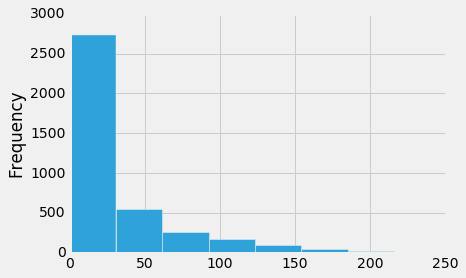

In [109]:
ratDf["Neg"].plot(kind = 'hist', xlim = (0, 250))

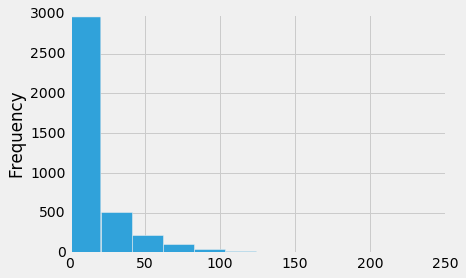

In [108]:
ratDf["Pos"].plot(kind = 'hist')

In [110]:
totalInteractions = ratDf["Tot"].sum()

In [113]:
ratDf["Neg%"] = ratDf["Neg"]/totalInteractions

In [116]:
ratDf["Pos%"] = ratDf["Pos"]/totalInteractions

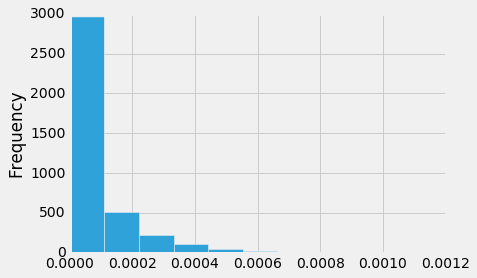

In [118]:
ratDf["Pos%"].plot(kind = 'hist')